# Multi-Task Learning for Spike Sorting 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Data Exploration

In [2]:
a2_df = pd.read_csv("data/A2.csv", index_col = 0)
a3_df = pd.read_csv("data/A3.csv", index_col = 0)
a4_df = pd.read_csv("data/A4.csv", index_col = 0)
a12_df = pd.read_csv("data/A12.csv", index_col = 0)
a21_df = pd.read_csv("data/A21.csv", index_col = 0)

In [3]:
class_counts_a2 = a2_df['track'].value_counts()
class_counts_a3 = a3_df['track'].value_counts()
class_counts_a4 = a4_df['track'].value_counts()
class_counts_a12 = a12_df['track'].value_counts()
class_counts_a21 = a21_df['track'].value_counts()

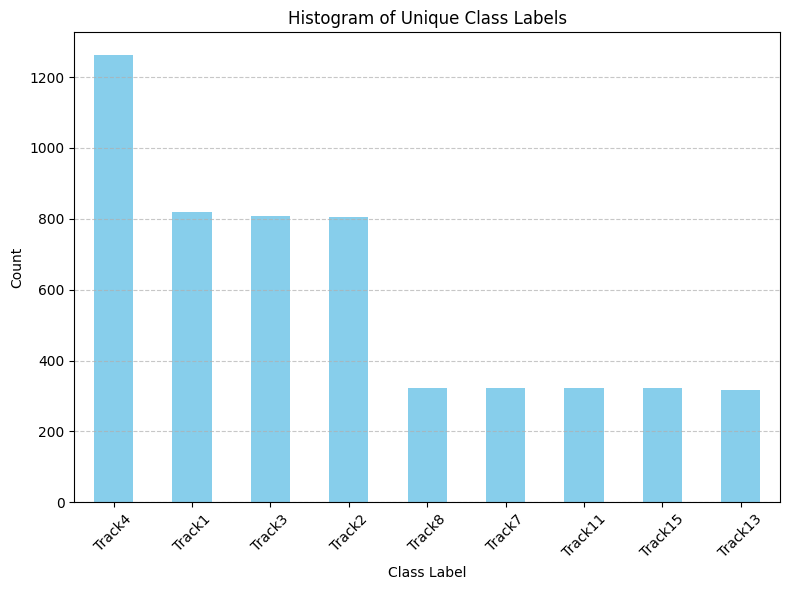

In [4]:
joined_df = pd.concat([a2_df, a3_df, a4_df, a12_df, a21_df], axis=0)

class_counts_overall = joined_df['track'].value_counts()
plt.figure(figsize=(8, 6))
class_counts_overall.plot(kind='bar', color='skyblue')
plt.title('Histogram of Unique Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
track_labels = joined_df['track'].unique()

df = pd.DataFrame(columns=track_labels)

for data_set in [a2_df, a3_df, a4_df, a12_df, a21_df]:
    new_row = []
    for track in track_labels:
        new_row.append(len(data_set[data_set["track"] == track]))
    print(new_row)
    df.loc[-1] = new_row # adding a row
    df.index = df.index + 1  # shifting index
    df = df.sort_index() 

df.head()

[268, 268, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 173, 173, 0, 0, 0, 0, 0]
[0, 687, 632, 647, 0, 0, 0, 0, 0]
[321, 0, 0, 0, 324, 322, 323, 318, 324]
[218, 308, 0, 0, 0, 0, 0, 0, 0]


,Track3,Track4,Track2,Track1,Track8,Track15,Track11,Track13,Track7
0,218,308,0,0,0,0,0,0,0
1,321,0,0,0,324,322,323,318,324
2,0,687,632,647,0,0,0,0,0
3,0,0,173,173,0,0,0,0,0
4,268,268,0,0,0,0,0,0,0
